## Lab 2_1 Single layer NN without nn.Linear (fully connected module)

In [96]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [97]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [98]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)
X.shape, y.shape

((1000, 2), (1000,))

In [99]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [100]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [101]:
# Define dimensions
input_dim = X_train.shape[1]
output_dim = 2

# Initialize weights and biases with requires_grad=True
w1 = torch.randn(input_dim, output_dim, requires_grad=True)
b1 = torch.zeros(output_dim, requires_grad=True)

# print shapes (each xi is a 2nd point)
print(f"w1 shape: {w1.shape}")
print(f"b2 shape: {b1.shape}")

w1 shape: torch.Size([2, 2])
b2 shape: torch.Size([2])


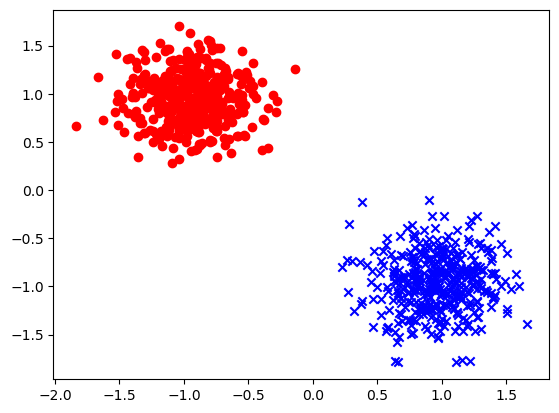

In [102]:
plt.scatter(X_train[y_train == 0, 0].reshape(-1,1), X_train[y_train == 0, 1].reshape(-1,1), color='red', label='Class 0', marker='o')
plt.scatter(X_train[y_train == 1, 0].reshape(-1,1), X_train[y_train == 1, 1].reshape(-1,1), color='blue', label='Class 1', marker='x')
plt.show()

In [103]:
import torch.nn.functional as F

# Define softmax activation function
def softmax(x):
  return torch.exp(x) / torch.sum(torch.exp(x), dim=1, keepdim=True)

# Define the forward pass
def forward(X):
  z1 = torch.matmul(X, w1) + b1
  y_pred = softmax(z1)
  return y_pred

# Define the cross-entropy loss function
def cross_entropy(pred, truth):
  # One-hot encode the truth labels
  truth_onehot = F.one_hot(truth, num_classes=output_dim).float()
  # Calculate cross-entropy loss
  loss = -torch.mean(torch.sum(truth_onehot * torch.log(pred), dim=1))
  return loss

In [104]:
# Define learning rate and number of epochs
learning_rate = 0.01
epochs = 100

# Training loop
for i in range(epochs):
  # Forward pass
  y_pred = forward(X_train)

  # Compute loss
  loss = cross_entropy(y_pred, y_train)

  # Backward pass
  loss.backward()

  # Update weights and biases
  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    b1 -= learning_rate * b1.grad

  # Zero gradients
  w1.grad.zero_()
  b1.grad.zero_()

  # Print loss every 10 epochs
  if (i + 1) % 10 == 0:
    print(f"Epoch [{i+1}/{epochs}], \tLoss: {loss.item()}")

Epoch [10/100], 	Loss: 0.0249008946120739
Epoch [20/100], 	Loss: 0.0247480608522892
Epoch [30/100], 	Loss: 0.024597203359007835
Epoch [40/100], 	Loss: 0.02444826066493988
Epoch [50/100], 	Loss: 0.024301208555698395
Epoch [60/100], 	Loss: 0.02415602281689644
Epoch [70/100], 	Loss: 0.024012653157114983
Epoch [80/100], 	Loss: 0.023871058598160744
Epoch [90/100], 	Loss: 0.023731229826807976
Epoch [100/100], 	Loss: 0.023593105375766754


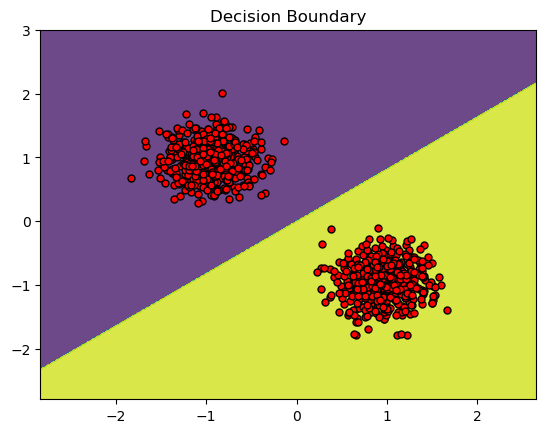

In [105]:
import matplotlib.pyplot as plt

# Visualization (Decision Boundary)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
y_pred_grid = forward(grid)
_, predicted_labels_grid = torch.max(y_pred_grid, 1)
predicted_grid = predicted_labels_grid.reshape(xx.shape)

plt.contourf(xx, yy, predicted_grid, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c="r", edgecolors='k', marker='o', s=25)
# plt.scatter(X[y == 1, 0], X[y == 1, 0], c="r", edgecolors='k', marker='x', s=25)

plt.title('Decision Boundary')
plt.show()